In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [6]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

In [10]:
'''
with mask  -->  1

without mask  -->  0
'''

'\nwith mask  -->  1\n\nwithout mask  -->  0\n'

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


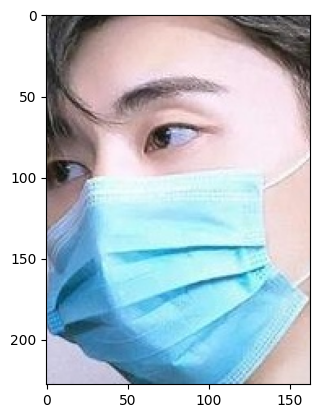

In [17]:
# displaying with mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

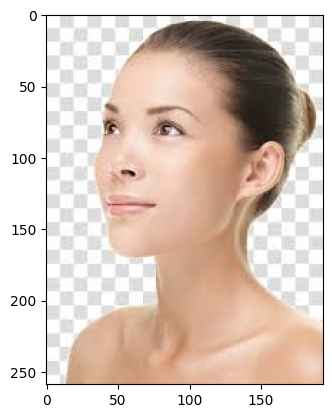

In [18]:
# displaying without mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
# convert images to numpy arrays+

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
X_train[0]

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)

In [35]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

In [36]:
import tensorflow as tf
from tensorflow import keras

2024-07-20 19:12:53.478491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 19:12:53.478612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 19:12:53.617751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [37]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5


2024-07-20 19:13:21.811005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31758: 7.18885, expected 6.34915
2024-07-20 19:13:21.811064: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31794: 6.79032, expected 5.95062
2024-07-20 19:13:21.811074: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31795: 6.91364, expected 6.07395
2024-07-20 19:13:21.811082: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31796: 7.21123, expected 6.37153
2024-07-20 19:13:21.811090: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31809: 7.14567, expected 6.30597
2024-07-20 19:13:21.811099: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31823: 7.30269, expected 6.46299
2024-07-20 19:13:21.811107: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31824: 7.17199, expected 6.33229
2024-07-20 19:13:21.811115:

 18/170 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5079 - loss: 1.6193

I0000 00:00:1721502805.626819     257 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5501 - loss: 0.9395

2024-07-20 19:13:28.505433: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 216: 4.75113, expected 4.12849
2024-07-20 19:13:28.505528: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 576: 5.0232, expected 4.40056
2024-07-20 19:13:28.505542: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 707: 4.37677, expected 3.75413
2024-07-20 19:13:28.505551: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 914: 5.20101, expected 4.57836
2024-07-20 19:13:28.505561: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1125: 5.13819, expected 4.51554
2024-07-20 19:13:28.505569: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1189: 5.15223, expected 4.52959
2024-07-20 19:13:28.505578: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1238: 5.18909, expected 4.56645
2024-07-20 19:13:28.505587: E external/

170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - acc: 0.5505 - loss: 0.9360 - val_acc: 0.8264 - val_loss: 0.4560
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.7464 - loss: 0.5091 - val_acc: 0.9058 - val_loss: 0.3502
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8078 - loss: 0.4081 - val_acc: 0.9124 - val_loss: 0.2414
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8447 - loss: 0.3312 - val_acc: 0.9008 - val_loss: 0.2237
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8512 - loss: 0.3107 - val_acc: 0.9058 - val_loss: 0.2134


In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

35/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9066 - loss: 0.2484

2024-07-20 19:13:41.952937: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.40581, expected 6.55672
2024-07-20 19:13:41.952991: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.2703, expected 5.42122
2024-07-20 19:13:41.953001: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.38079, expected 6.53171
2024-07-20 19:13:41.953010: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.27105, expected 5.42196
2024-07-20 19:13:41.953018: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.00385, expected 6.15476
2024-07-20 19:13:41.953026: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.11578, expected 5.26669
2024-07-20 19:13:41.953034: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.80711, expected 5.95802
2024-07-20 19:13:41.953043: E external/local_xla/xla/ser

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9056 - loss: 0.2494
Test Accuracy = 0.9000661969184875


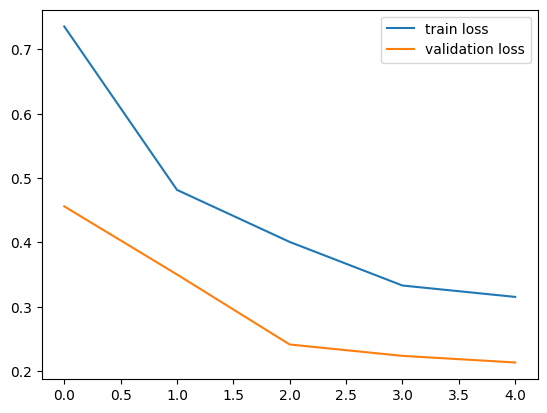

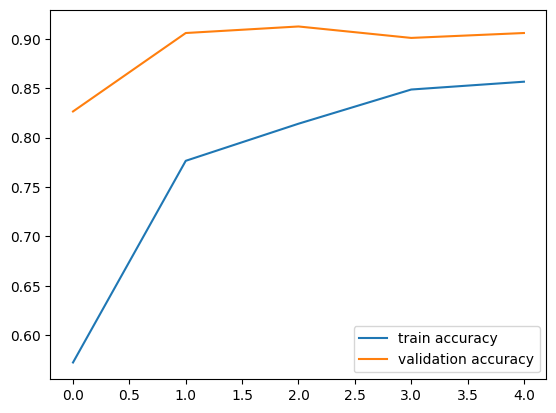

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_1006.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.37446567 0.7092362 ]]
1
The person in the image is wearing a mask


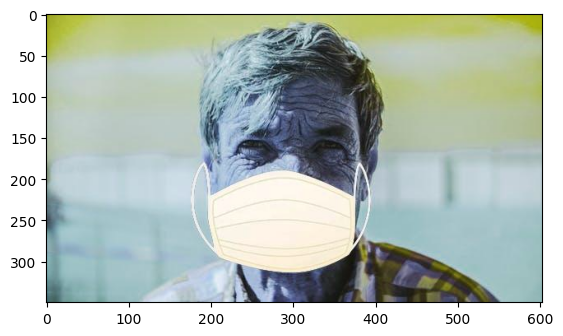

In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [46]:
from tensorflow.keras.utils import plot_model

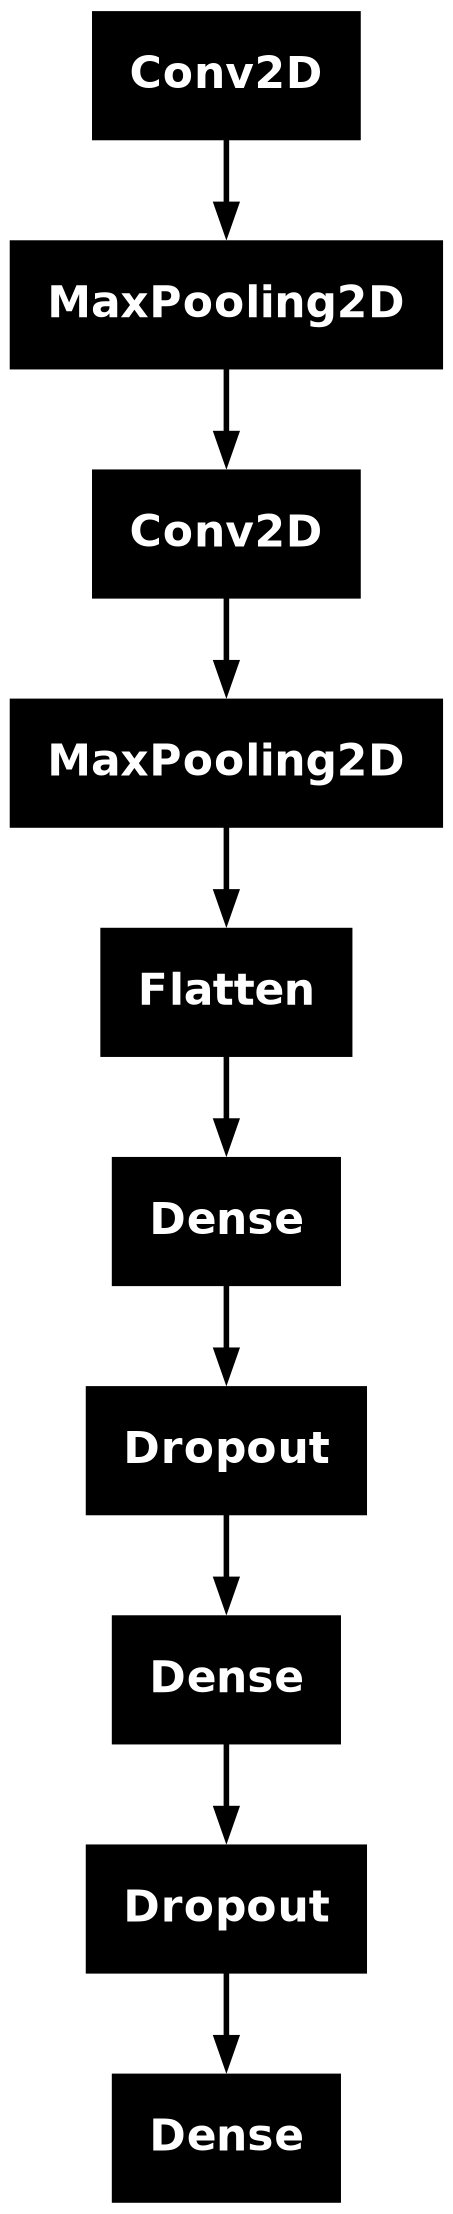

In [47]:
plot_model(model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False)